In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data=pd.read_csv("Data/Train.csv")

In [4]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [5]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

1. Item_Outlet_Sales is dependent varaible. Others are independent variables
2. No need to change any data type
3. Total Number of independent variables: 11
4. Categorical independent Variables: 7 variables -> Item_Identifier, Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
5.Continuous independent varaibles: 4 variables - > Item_Weight,
6. Model: Supervised Learning; As Target/Dependent varaible is continuous in nature, regression model is better suitable model.

| Column | Description|
|---|--|
|Item_Identifier | Unique Prodcut ID|
|Item_Weight  | Weight Of the product|
|Item_Fat_Content | Fat content in thhe product|
|Item_Visibility | %of total display are of the product|
|Item_Type | Category of product|
|Item_MRP  |Maximum retail price of the product|
|Outlet_Identifier| Unique Store ID|
|Outlet_Establishment_Year | Store Estabilishment Year|
|Outlet_Size| size of the store|
|Outlet_Location_Type  | Type of the city where store is located|
|Outlet_Type| Type of the outlet (super market or grocery store)|
|Item_Outlet_Sales|Sales of the product in the particular store|

In [7]:
if 5>10:
    print("fan")
elif 8!=9:
    print("glass")
else:
    print("cream")

glass


# Hypothesis

1. Items sales increases with decrease in FAT content
2. MRP of the product affects te sales price for the particular product category
3. Size and city of the product affect the sales price of the item
4. Outlet type affect the sales of the product.

In [8]:
x=data.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)
y=data['Item_Outlet_Sales']

# Missing Values


In [9]:
x.describe(include='all')

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
count   7060.000000             8523      8523.000000                   8523   
unique          NaN                5              NaN                     16   
top             NaN          Low Fat              NaN  Fruits and Vegetables   
freq            NaN             5089              NaN                   1232   
mean      12.857645              NaN         0.066132                    NaN   
std        4.643456              NaN         0.051598                    NaN   
min        4.555000              NaN         0.000000                    NaN   
25%        8.773750              NaN         0.026989                    NaN   
50%       12.600000              NaN         0.053931                    NaN   
75%       16.850000              NaN         0.094585                    NaN   
max       21.350000              NaN         0.328391                    NaN   

           Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
count   8523.000000              8523                8523.000000        6113   
unique          NaN                10                        NaN           3   
top             NaN            OUT027                        NaN      Medium   
freq            NaN               935                        NaN        2793   
mean     140.992782               NaN                1997.831867         NaN   
std       62.275067               NaN                   8.371760         NaN   
min       31.290000               NaN                1985.000000         NaN   
25%       93.826500               NaN                1987.000000         NaN   
50%      143.012800               NaN                1999.000000         NaN   
75%      185.643700               NaN                2004.000000         NaN   
max      266.888400               NaN                2009.000000         NaN   

       Outlet_Location_Type        Outlet_Type  
count                  8523               8523  
unique                    3                  4  
top                  Tier 3  Supermarket Type1  
freq                   3350               5577  
mean                    NaN                NaN  
std                     NaN                NaN  
min                     NaN                NaN  
25%                     NaN                NaN  
50%                     NaN                NaN  
75%                     NaN                NaN  
max                     NaN                NaN

Item_Weight	, Outlet_Size has missing values

In [10]:
x.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
x['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

<AxesSubplot:>

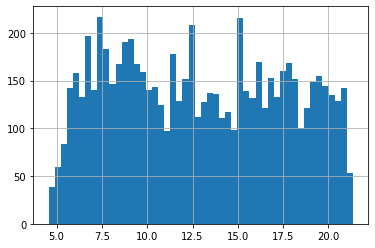

In [12]:
x['Item_Weight'].hist(bins=50)

<AxesSubplot:>

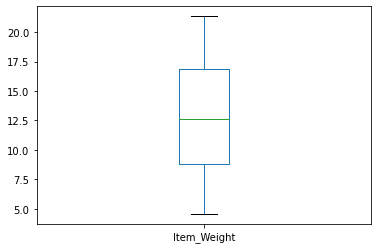

In [13]:
x['Item_Weight'].plot.box()

In [14]:
x['Item_Weight'].median()

12.6

In [15]:
x['Item_Weight'].mode()

0    12.15
dtype: float64

In [16]:
mean_val=x['Item_Weight'].mean()
x['Item_Weight'].fillna(value=mean_val,inplace=True)

In [17]:
x['Item_Weight'].isnull().sum()

0

In [18]:
x['Outlet_Size'].isnull().sum()

2410

In [19]:
mode_val=x['Outlet_Size'].mode()[0]
x['Outlet_Size'].fillna(value=mode_val,inplace=True)

In [20]:
x['Outlet_Size'].isnull().sum()

0

In [21]:
x=pd.get_dummies(x)

In [22]:
x.head()


Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                    0                         1                         0   
1                    0                         0                         1   
2                    0                         1                         0   
3                    0                         0                         1   
4                    0                         1                         0   

   Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Baking Goods  \
0                         0                     0                       0   
1                         0                     0                       0   
2                         0                     0                       0   
3                         0                     0                       0   
4                         0                     0                       0   

   ...  Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0  ...                 0                   1                  0   
1  ...                 0                   1                  0   
2  ...                 0                   1                  0   
3  ...                 0                   1                  0   
4  ...                 1                   0                  0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                            1                            0   
1                            0                            0   
2                            1                            0   
3                            0                            0   
4                            0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                            0                          0   
1                            1                          0   
2                            0                          0   
3                            1                          1   
4                            1                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   
3                              0                              0   
4                              1                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 45 columns]

### splitting the data into train and test data

In [23]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56)

In [24]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((6392, 45), (6392,), (2131, 45), (2131,))

In [25]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [26]:
lr=LR(normalize=True)
lr.fit(train_x,train_y)

LinearRegression(normalize=True)

In [27]:
train_predict=lr.predict(train_x)
k=mae(train_predict,train_y)
print('Training mean abosolute Error' , k)

Training mean abosolute Error 828.8679961201502


In [28]:
test_predict=lr.predict(test_x)
k=mae(test_predict,test_y)
print('Test Mean Absolute Error' , k)

Test Mean Absolute Error 882.7747598310652


### Parameters of linear Regreesion

In [29]:
lr.coef_

array([ 1.76590265e-01, -3.89243132e+02,  1.55056917e+01, -1.31192962e+14,
       -2.23646667e+13, -2.23646667e+13, -2.23646667e+13, -2.23646667e+13,
       -2.23646667e+13,  5.60154525e+13,  5.60154525e+13,  5.60154525e+13,
        5.60154525e+13,  5.60154525e+13,  5.60154525e+13,  5.60154525e+13,
        5.60154525e+13,  5.60154525e+13,  5.60154525e+13,  5.60154525e+13,
        5.60154525e+13,  5.60154525e+13,  5.60154525e+13,  5.60154525e+13,
        5.60154525e+13,  3.30449071e+14, -5.88913008e+14,  4.35419518e+14,
        7.80561648e+14, -1.03836096e+15, -9.32511336e+14,  2.31602325e+14,
       -2.20545293e+14,  8.77829700e+13,  1.60407201e+14, -7.21536259e+14,
        2.50395865e+14,  6.06341717e+13, -2.19268805e+14,  5.55262575e+14,
       -7.23320181e+13, -2.17452207e+14,  2.30719413e+14,  7.75557799e+14,
       -6.60000307e+14])

### plotting co-efficients

Text(0.5, 1.0, 'Coefficient Plots')

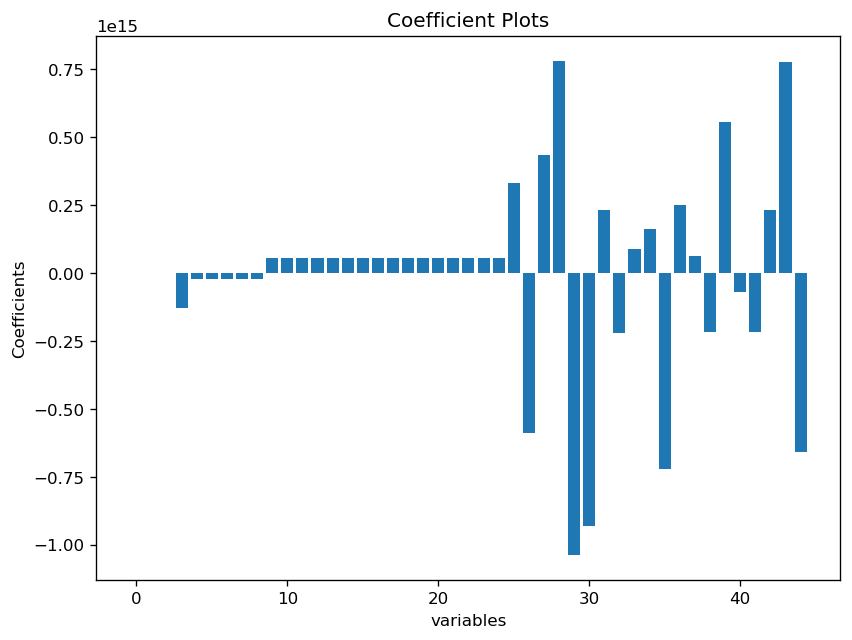

In [30]:
plt.figure(figsize=(8,6),dpi=120,facecolor='w',edgecolor='b')
x_r=range(len(train_x.columns))
y_r=lr.coef_
plt.bar(x_r,y_r)
plt.xlabel("variables")
plt.ylabel("Coefficients")
plt.title("Coefficient Plots")

In [31]:
residuals=pd.DataFrame({
    'fitted values':test_y,
    'predicted values':test_predict
})
residuals['residuals']=residuals['fitted values']-residuals['predicted values']
residuals.head()

fitted values  predicted values  residuals
2172       697.7584             960.0  -262.2416
6228      1414.1592            2592.0 -1177.8408
2404      3078.6592            3072.0     6.6592
99        1314.2892            3104.0 -1789.7108
4945      1403.5064            1504.0  -100.4936

#### plotting residuals curve (Is there constant varaince or Homoscedastic)

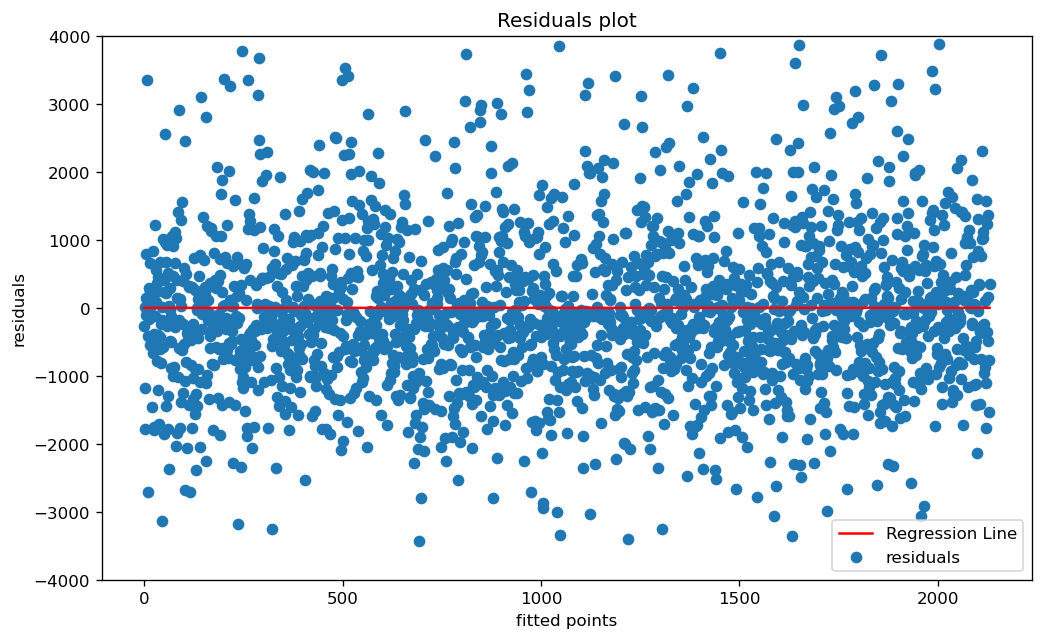

In [32]:
plt.figure(figsize=(10,6), dpi=120, facecolor='w', edgecolor='b')
f=range(0,test_y.shape[0])
k=[0 for i in range(0,test_y.shape[0])]
plt.scatter(f,residuals.residuals[:],label='residuals')
plt.plot(f,k,color='red',label='Regression Line')
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.title('Residuals plot')
plt.ylim(-4000,4000)
plt.legend()

### checking distribution of Residuals

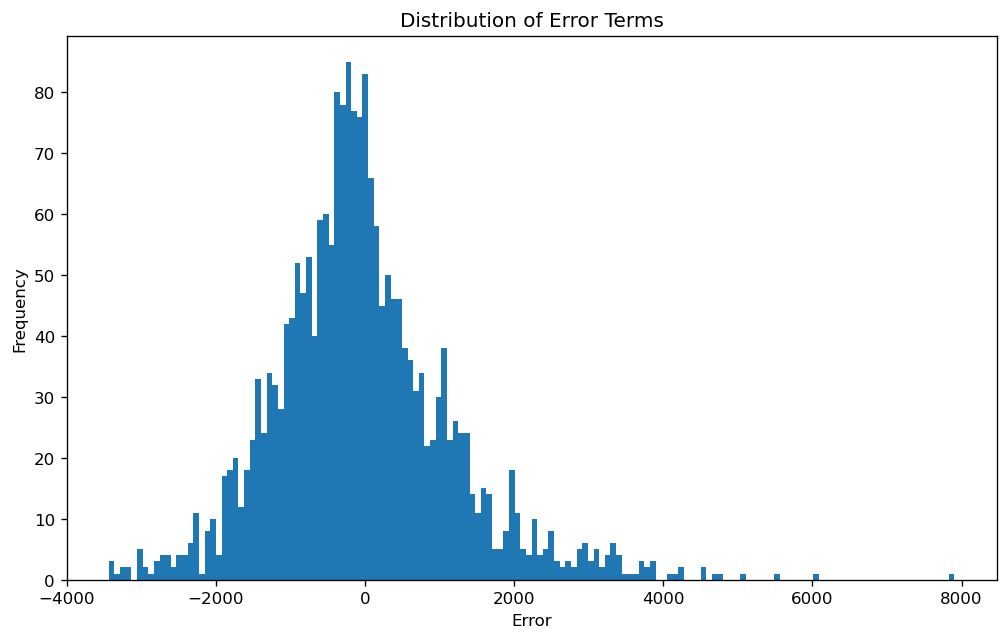

In [33]:
plt.figure(figsize=(10,6),dpi=120,facecolor='w',edgecolor='b')
plt.hist(residuals.residuals,bins=150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

according to histogram,distibution of error is normal

### Q-Q Plot( Is data normally distributed?)

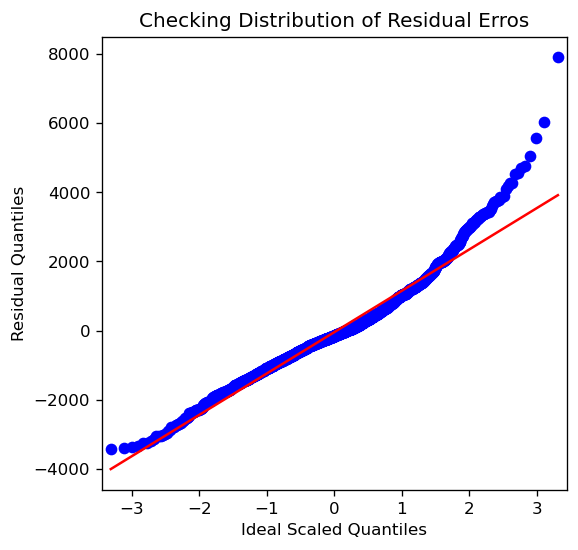

In [34]:
from statsmodels.graphics.gofplots import qqplot
fix,ax=plt.subplots(figsize=(5,5), dpi=120)
qqplot(residuals.residuals, line='s',ax=ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking Distribution of Residual Erros')
plt.show()

The QQ plot clearly verifies our findings from the histogram of residuals, the data is mostly normal in nature,
but there are some outliers on the higher end of residuals


From the ACF plot, we can clearly see that there is almost negligible correlation between the error terms . 
hence there is no auto co-relation  present in the data

### Variance Inflation Factor (VIF) - check fo multi-collinearity

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
VIF=pd.Series([variance_inflation_factor(train_x.values,i) for i in range(train_x.shape[1])],index=train_x.columns)
VIF

C:\Users\agni1\Anaconda3\envs\tf\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                        1.018532
Item_Visibility                    1.104803
Item_MRP                           1.012891
Outlet_Establishment_Year               inf
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood                       inf
Item_Type_Snack Foods           

### Model Interpretability

In [36]:
coefficients=pd.DataFrame({
    'Variables':train_x.columns,
    'coefficients':lr.coef_})
coefficients.head()

Variables  coefficients
0                Item_Weight  1.765903e-01
1            Item_Visibility -3.892431e+02
2                   Item_MRP  1.550569e+01
3  Outlet_Establishment_Year -1.311930e+14
4        Item_Fat_Content_LF -2.236467e+13

In [37]:
sig_var=coefficients[coefficients.coefficients>0.51]

In [38]:
subset=train_x[sig_var['Variables'].values]
subset.head()

Item_MRP  Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
178    42.1112                       0                 0                    0   
3644  159.3604                       0                 0                    0   
3197  199.5742                       0                 0                    0   
1791   98.8384                       1                 0                    0   
2184   92.3462                       0                 0                    0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
178                  0                0                       0   
3644                 0                0                       0   
3197                 0                0                       0   
1791                 0                0                       0   
2184                 0                0                       0   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
178                                 0                      0   
3644                                0                      0   
3197                                1                      0   
1791                                0                      0   
2184                                0                      0   

      Item_Type_Health and Hygiene  ...  Outlet_Identifier_OUT017  \
178                              0  ...                         0   
3644                             1  ...                         0   
3197                             0  ...                         0   
1791                             0  ...                         0   
2184                             0  ...                         0   

      Outlet_Identifier_OUT018  Outlet_Identifier_OUT035  \
178                          0                         0   
3644                         0                         0   
3197                         0                         0   
1791                         0                         0   
2184                         0                         0   

      Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  Outlet_Size_Medium  \
178                          0                         0                   0   
3644                         0                         0                   1   
3197                         0                         0                   1   
1791                         0                         0                   0   
2184                         1                         0                   0   

      Outlet_Size_Small  Outlet_Location_Type_Tier 2  \
178                   1                            0   
3644                  0                            1   
3197                  0                            0   
1791                  1                            0   
2184                  1                            0   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  
178                               0                              0  
3644                              1                              0  
3197                              0                              0  
1791                              0                              0  
2184                              1                              0  

[5 rows x 28 columns]

In [39]:
sig_var

Variables  coefficients
2                          Item_MRP  1.550569e+01
9            Item_Type_Baking Goods  5.601545e+13
10                 Item_Type_Breads  5.601545e+13
11              Item_Type_Breakfast  5.601545e+13
12                 Item_Type_Canned  5.601545e+13
13                  Item_Type_Dairy  5.601545e+13
14           Item_Type_Frozen Foods  5.601545e+13
15  Item_Type_Fruits and Vegetables  5.601545e+13
16            Item_Type_Hard Drinks  5.601545e+13
17     Item_Type_Health and Hygiene  5.601545e+13
18              Item_Type_Household  5.601545e+13
19                   Item_Type_Meat  5.601545e+13
20                 Item_Type_Others  5.601545e+13
21                Item_Type_Seafood  5.601545e+13
22            Item_Type_Snack Foods  5.601545e+13
23            Item_Type_Soft Drinks  5.601545e+13
24          Item_Type_Starchy Foods  5.601545e+13
25         Outlet_Identifier_OUT010  3.304491e+14
27         Outlet_Identifier_OUT017  4.354195e+14
28         Outlet_Identifier_OUT018  7.805616e+14
31         Outlet_Identifier_OUT035  2.316023e+14
33         Outlet_Identifier_OUT046  8.778297e+13
34         Outlet_Identifier_OUT049  1.604072e+14
36               Outlet_Size_Medium  2.503959e+14
37                Outlet_Size_Small  6.063417e+13
39      Outlet_Location_Type_Tier 2  5.552626e+14
42    Outlet_Type_Supermarket Type1  2.307194e+14
43    Outlet_Type_Supermarket Type2  7.755578e+14